//
//
First we will predict number of converted to know whether the campaign achieved its business goal, second we will predict unique_clicks to know how cliks have a stronger intent than opens and are often precursors to conversion.
//
//

In [403]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [404]:
df = pd.read_excel("onesignal.xlsx")
df.head(8)

,app_id,notification_id,email_subject,email_from_name,email_from_address,email_preheader,email_reply_to_address,include_unsubscribed,included_segments,excluded_segments,isEmail,email_click_tracking_disabled,delayed_option,delivery_time_of_day,queued_date,queued_time,send_after_date,send_after_time,completed_date,completed_time,queued_date_id,send_after_date_id,completed_date_id,successful,failed,errored,converted,received,suppressed,frequency_capped,opened,unique_opens,clicks,unique_clicks,bounced,reported_spam,unsubscribed
0,510e4d66-b62f-495e-851e-71045f2c38c1,9a31e616-5a9c-4c64-a4ce-767e4c3ff769,RSB - Orlando Pirates : à quelle heure et sur ...,Lematin,matinnews@lematin.ma,NaN,NaN,NaN,Old List,NaN,1,0,immediate,"Friday, May 20, 2022 1:25 PM UTC+01:00",2022-05-20,12:25:42,2022-05-20,12:25:42,2022-05-20,12:26:03,8176,8176,8176.0,4029,5,5,177,0,0,0,3591,8,177,0,50,2,11
1,510e4d66-b62f-495e-851e-71045f2c38c1,dc655d15-da3d-4c4c-81f8-a947d9429c89,Variole du singe : le Maroc se dote d'un plan ...,Matin News,matinnews@lematin.ma,NaN,NaN,NaN,Old List,NaN,1,0,immediate,"Monday, May 23, 2022 7:00 AM UTC+01:00",2022-05-22,20:08:04,2022-05-23,06:00:00,2022-05-23,06:00:33,8178,8179,8179.0,4013,16,16,306,0,0,0,2207,5,306,1,4,0,2
2,510e4d66-b62f-495e-851e-71045f2c38c1,6ac1f296-5fdc-4b67-9e35-4d7eb420cb0e,Variole du singe : Le Maroc annonce trois cas ...,Matin News,matinnews@lematin.ma,NaN,NaN,NaN,"Subscribed Users, Old List",NaN,1,0,immediate,"Monday, May 23, 2022 8:53 PM UTC+01:00",2022-05-23,19:53:57,2022-05-23,19:53:57,2022-05-23,19:54:12,8179,8179,8179.0,4049,2,2,286,0,0,0,3437,4,286,0,5,0,0
3,510e4d66-b62f-495e-851e-71045f2c38c1,6d04913f-5522-442a-b83a-8c9fa6413ae4,Youssef Cheikhi réélu à la tête du Groupement ...,Matin News,matinnews@lematin.ma,NaN,NaN,NaN,"Old List, Subscribed Users",NaN,1,0,immediate,"Monday, May 23, 2022 3:27 PM UTC+01:00",2022-05-23,14:27:06,2022-05-23,14:27:07,2022-05-23,14:34:18,8179,8179,8179.0,4034,0,0,105,0,0,0,3496,4,105,0,5,0,0
4,510e4d66-b62f-495e-851e-71045f2c38c1,dbb982f2-78f1-4c56-a769-c54ea17bae63,Souveraineté industrielle : Comment réduire la...,Matin News,matinnews@lematin.ma,NaN,NaN,NaN,"Old List, Subscribed Users, Breaking News, New...",NaN,1,0,immediate,"Friday, June 3, 2022 9:17 AM UTC+01:00",2022-06-03,08:17:30,2022-06-03,08:17:30,2022-06-03,08:17:38,8190,8190,8190.0,4118,2,2,82,0,0,0,5378,7,82,1,5,1,0
5,510e4d66-b62f-495e-851e-71045f2c38c1,ceb6ed80-e04d-4299-804c-a18dd13b92af,Séisme : le programme de reconstruction rapide...,Lematin,hello@news-send.lematin.ma,NaN,NaN,0.0,Subscribed Users,NaN,1,0,immediate,"Tuesday, September 26, 2023 7:00 AM UTC+01:00",2023-09-25,21:01:19,2023-09-26,06:00:00,2023-09-26,06:07:53,8669,8670,8670.0,34087,1161,0,4784,33023,1339,0,5302,4024,4783,561,2,1,6
6,510e4d66-b62f-495e-851e-71045f2c38c1,a32f734f-8c4a-4f29-8751-d20e9ac3d6ec,S.M. le Roi donne Ses Hautes Instructions pour...,Lematin,hello@news-send.lematin.ma,NaN,NaN,0.0,Subscribed Users,NaN,1,0,immediate,"Tuesday, September 26, 2023 2:51 PM UTC+01:00",2023-09-26,13:51:21,2023-09-26,13:51:21,2023-09-26,13:53:23,8670,8670,8670.0,34082,1146,0,2693,33043,1341,0,16112,9953,2693,971,0,2,30
7,510e4d66-b62f-495e-851e-71045f2c38c1,59963fbf-0ab4-4c3a-80cf-25fb6c282760,La réforme du code de la famille relancée ; Le...,Lematin,hello@news-send.lematin.ma,NaN,NaN,0.0,Subscribed Users,NaN,1,0,immediate,"Wednesday, September 27, 2023 7:00 AM UTC+01:00",2023-09-26,23:14:56,2023-09-27,06:00:00,2023-09-27,06:07:49,8670,8671,8671.0,34021,1173,0,4151,32951,1342,0,5880,4558,4151,574,1,3,5


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   app_id                         687 non-null    object        
 1   notification_id                687 non-null    object        
 2   email_subject                  687 non-null    object        
 3   email_from_name                687 non-null    object        
 4   email_from_address             687 non-null    object        
 5   email_preheader                113 non-null    object        
 6   email_reply_to_address         138 non-null    object        
 7   include_unsubscribed           600 non-null    float64       
 8   included_segments              597 non-null    object        
 9   excluded_segments              13 non-null     object        
 10  isEmail                        687 non-null    int64         
 11  email_click_trackin

In [406]:
df.describe()

,include_unsubscribed,isEmail,email_click_tracking_disabled,queued_date,send_after_date,queued_date_id,send_after_date_id,completed_date_id,successful,failed,errored,converted,received,suppressed,frequency_capped,opened,unique_opens,clicks,unique_clicks,bounced,reported_spam,unsubscribed
count,600.0,687.0,687.0,687,687,687.000000,687.000000,612.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.0,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,0.0,1.0,0.0,2024-12-25 09:30:07.860261888,2024-12-25 19:31:42.183405824,9126.395924,9126.819505,9123.014706,17481.458515,1047.088792,7.411936,248.521106,16384.930131,1252.359534,0.0,1870.818049,1381.845706,248.510917,106.723435,2.379913,0.171761,3.448326
min,0.0,1.0,0.0,2022-05-20 00:00:00,2022-05-20 00:00:00,8176.000000,8176.000000,8176.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.0,0.0,2024-11-06 00:00:00,2024-11-06 00:00:00,9077.000000,9077.000000,9075.750000,1102.500000,126.000000,2.000000,2.000000,975.000000,135.000000,0.0,27.500000,22.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,0.0,1.0,0.0,2024-12-29 00:00:00,2024-12-29 00:00:00,9130.000000,9130.000000,9125.000000,1471.000000,139.000000,2.000000,12.000000,1346.000000,147.000000,0.0,212.000000,147.000000,12.000000,4.000000,0.000000,0.000000,0.000000
75%,0.0,1.0,0.0,2025-03-12 00:00:00,2025-03-12 12:00:00,9203.000000,9203.500000,9199.250000,48191.000000,2974.500000,2.000000,196.000000,45295.500000,3015.000000,0.0,1082.500000,978.500000,196.000000,99.000000,1.000000,0.000000,2.000000
max,0.0,1.0,0.0,2025-05-26 00:00:00,2025-05-26 00:00:00,9278.000000,9278.000000,9278.000000,65912.000000,4799.000000,1851.000000,5138.000000,61933.000000,6086.000000,0.0,22606.000000,12700.000000,5138.000000,1062.000000,236.000000,6.000000,99.000000
std,0.0,0.0,0.0,NaN,NaN,125.734404,125.671790,130.376585,24237.593046,1428.076934,99.259139,619.175100,22848.785409,1780.351816,0.0,3430.986417,2457.560714,619.162714,205.806305,11.871263,0.598507,9.484982


In [407]:
df.isnull().sum()

app_id                             0
notification_id                    0
email_subject                      0
email_from_name                    0
email_from_address                 0
email_preheader                  574
email_reply_to_address           549
include_unsubscribed              87
included_segments                 90
excluded_segments                674
isEmail                            0
email_click_tracking_disabled      0
delayed_option                   670
delivery_time_of_day             670
queued_date                        0
queued_time                        0
send_after_date                    0
send_after_time                    0
completed_date                    24
completed_time                    75
queued_date_id                     0
send_after_date_id                 0
completed_date_id                 75
successful                         0
failed                             0
errored                            0
converted                          0
r

In [408]:
#since that some columns have null values, we will drop them
threshold = len(df) * 0.5
cols_to_drop = [col for col in df.columns if df[col].count() < threshold and col != "email_reply_to_address"]

# Drop only those columns
df.drop(columns=cols_to_drop, inplace=True)


In [409]:
#also there are some columns that have 0 in all values, so we will drop them
df = df.drop(columns=["email_click_tracking_disabled"])

In [410]:
df['include_unsubscribed'].fillna(0, inplace=True)
df.drop(columns=["include_unsubscribed"], inplace=True)

In [411]:
df.isnull().sum()

app_id                      0
notification_id             0
email_subject               0
email_from_name             0
email_from_address          0
email_reply_to_address    549
included_segments          90
isEmail                     0
queued_date                 0
queued_time                 0
send_after_date             0
send_after_time             0
completed_date             24
completed_time             75
queued_date_id              0
send_after_date_id          0
completed_date_id          75
successful                  0
failed                      0
errored                     0
converted                   0
received                    0
suppressed                  0
frequency_capped            0
opened                      0
unique_opens                0
clicks                      0
unique_clicks               0
bounced                     0
reported_spam               0
unsubscribed                0
dtype: int64

In [412]:
df['completed_date'].fillna(method='ffill', inplace=True)
df['completed_time'].fillna(method='ffill', inplace=True)

In [413]:
# Check for duplicates
df['completed_date_id'].duplicated().any()
df['completed_date_id'].duplicated().sum()
df['completed_date_id'].value_counts()

completed_date_id
9099.0    12
9068.0     8
9160.0     7
9088.0     7
9138.0     7
          ..
9038.0     1
9248.0     1
9255.0     1
8176.0     1
9278.0     1
Name: count, Length: 261, dtype: int64

In [414]:
df['completed_date_id'] = df['completed_date_id'].fillna(method='ffill')

In [415]:
df['included_segments'] = df['included_segments'].fillna(method='ffill')

In [416]:
df.isnull().sum()

app_id                      0
notification_id             0
email_subject               0
email_from_name             0
email_from_address          0
email_reply_to_address    549
included_segments           0
isEmail                     0
queued_date                 0
queued_time                 0
send_after_date             0
send_after_time             0
completed_date              0
completed_time              0
queued_date_id              0
send_after_date_id          0
completed_date_id           0
successful                  0
failed                      0
errored                     0
converted                   0
received                    0
suppressed                  0
frequency_capped            0
opened                      0
unique_opens                0
clicks                      0
unique_clicks               0
bounced                     0
reported_spam               0
unsubscribed                0
dtype: int64

In [417]:
df["email_reply_to_address"].value_counts()

email_reply_to_address
i.mtairag@lematin.ma    78
abo@lematin.ma          58
contact@lematin.ma       2
Name: count, dtype: int64

In [418]:
df['notification_id'].duplicated().any()

np.False_

In [419]:
df['app_id'].nunique()


1

In [420]:
df.drop(columns=["app_id","isEmail","frequency_capped"], inplace=True)

In [421]:
df["included_segments"].value_counts()

included_segments
Abonnés Premium                                                                              319
Subscribed Users                                                                             291
Abonné premium et gratuit                                                                     18
Abonnés Premium, Abonnés interne                                                              15
Test Layout segments                                                                           8
Abonnés interne, Abonnés Premium                                                               6
inscrits Ope Abo                                                                               4
List affilité premium read 27/11                                                               3
Abonné premium et gratuit, list abo finalisés dec 03_12                                        3
Old List                                                                                       2
list abo fin

<Axes: xlabel='included_segments'>

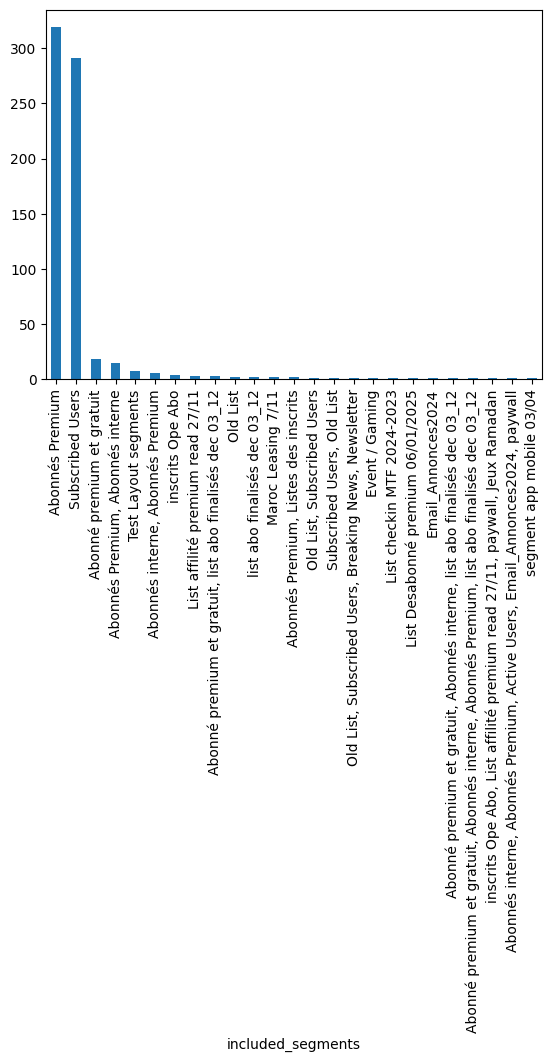

In [422]:
df['included_segments'].value_counts().plot(kind='bar')

In [423]:
df.isnull().sum()

notification_id             0
email_subject               0
email_from_name             0
email_from_address          0
email_reply_to_address    549
included_segments           0
queued_date                 0
queued_time                 0
send_after_date             0
send_after_time             0
completed_date              0
completed_time              0
queued_date_id              0
send_after_date_id          0
completed_date_id           0
successful                  0
failed                      0
errored                     0
converted                   0
received                    0
suppressed                  0
opened                      0
unique_opens                0
clicks                      0
unique_clicks               0
bounced                     0
reported_spam               0
unsubscribed                0
dtype: int64

In [424]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
from nltk.corpus import stopwords

french_stopwords = set(stopwords.words('french'))

def clean_french_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join(word for word in text.split() if word not in french_stopwords)
    return text

vectorizer = TfidfVectorizer(max_features=100)
X_subject = vectorizer.fit_transform(df['email_subject'].apply(clean_french_text))

In [425]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

df['sentiment'] = df['email_subject'].apply(lambda x: tb(x).sentiment[0])

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('dangvantuan/sentence-camembert-base') 
embeddings = model.encode(df['email_subject'].tolist())


In [426]:
df.sort_values('sentiment', ascending=False).head(10)  #positive

,notification_id,email_subject,email_from_name,email_from_address,email_reply_to_address,included_segments,queued_date,queued_time,send_after_date,send_after_time,completed_date,completed_time,queued_date_id,send_after_date_id,completed_date_id,successful,failed,errored,converted,received,suppressed,opened,unique_opens,clicks,unique_clicks,bounced,reported_spam,unsubscribed,sentiment
352,1728bf84-396f-4368-a0c2-87db2568c89f,[Test] Bonne année 2025,Insaf | LeMatin.ma,i.mtairag@lematin.ma,i.mtairag@lematin.ma,Subscribed Users,2025-01-01,11:25:07,2025-01-01,11:25:07,2025-01-01,11:25:09,9133,9133,9133.0,1,0,0,0,1,0,1,1,0,0,0,0,0,0.700
353,3d251832-7bd7-425d-9b34-cb30cecb26da,Bonne année 2025,Insaf | LeMatin.ma,i.mtairag@lematin.ma,i.mtairag@lematin.ma,"Abonné premium et gratuit, Abonnés interne, Ab...",2025-01-01,11:34:57,2025-01-01,11:34:57,2025-01-01,11:35:02,9133,9133,9133.0,1483,121,2,0,1366,120,101,75,0,0,0,0,1,0.700
54,d878fadc-323e-46ee-a307-2f53affa5435,[Test] Ne manquez pas notre Offre Spéciale Ren...,Insaf | LeMatin.ma,abo@lematin.ma,abo@lematin.ma,Subscribed Users,2024-09-24,20:09:19,2024-09-24,20:09:19,2024-09-25,06:10:37,9034,9034,9035.0,1,0,0,1,1,0,5,1,1,1,0,0,0,0.625
48,fb2931ec-a310-461f-aefb-cb1dec3ed014,[Test] Ne manquez pas notre Offre Spéciale Ren...,Insaf | LeMatin.ma,abo@lematin.ma,abo@lematin.ma,Abonnés Premium,2024-09-24,19:24:30,2024-09-24,19:24:30,2024-09-23,16:00:19,9034,9034,9033.0,1,0,0,0,1,0,2,1,0,0,0,0,0,0.625
49,ebda2d25-3541-4bb7-91f8-cf135b8a7db0,Ne manquez pas notre Offre Spéciale Rentrée 20...,Insaf | LeMatin.ma,abo@lematin.ma,abo@lematin.ma,inscrits Ope Abo,2024-09-24,19:08:41,2024-09-25,08:23:00,2024-09-25,08:23:04,9034,9035,9035.0,155,4,0,5,151,1,94,62,5,4,0,0,1,0.625
51,3eeb21ce-5198-4917-8d32-612bc62815ef,[Test] Ne manquez pas notre Offre Spéciale Ren...,Insaf | LeMatin.ma,abo@lematin.ma,abo@lematin.ma,Subscribed Users,2024-09-24,19:20:15,2024-09-24,19:20:15,2024-09-24,12:27:20,9034,9034,9034.0,1,0,0,0,1,0,4,1,0,0,0,0,0,0.625
274,a3ef35f1-9507-429e-9405-e182232d0e4d,Votre participation est précieuse,Insaf | LeMatin.ma,i.mtairag@lematin.ma,i.mtairag@lematin.ma,list abo finalisés dec 03_12,2024-12-03,10:40:54,2024-12-03,10:40:54,2024-12-03,10:40:59,9104,9104,9104.0,985,121,0,4,864,0,86,73,4,4,0,0,0,0.600
282,b8ffc199-6cd2-453b-a23d-da1a886fd699,Spécial “Maroc Digital” 2024,Insaf | LeMatin.ma,i.mtairag@lematin.ma,i.mtairag@lematin.ma,Abonné premium et gratuit,2024-12-06,16:36:25,2024-12-06,16:36:25,2024-12-06,16:36:30,9107,9107,9107.0,1263,134,0,7,1134,111,218,153,7,6,0,0,0,0.500
283,a886db27-9284-463b-9d80-63032f8bbecf,[Test] Spécial “Maroc Digital” 2024,Insaf | LeMatin.ma,i.mtairag@lematin.ma,i.mtairag@lematin.ma,Abonné premium et gratuit,2024-12-06,16:33:26,2024-12-06,16:33:26,2024-12-06,16:33:27,9107,9107,9107.0,1,0,0,1,1,0,1,1,1,1,0,0,0,0.500
644,4a1e9e1f-1b06-4929-a61e-312aeb064623,S.M. le Roi lance la construction de la platef...,Matin News,matinnews@lematin.ma,NaN,Subscribed Users,2025-05-07,17:26:21,2025-05-07,17:26:07,2025-05-07,17:29:45,9259,9259,9259.0,65213,3857,3,424,61498,5828,8214,6361,424,329,0,0,3,0.500


In [427]:
df.sort_values('sentiment').head(10)  #negative

,notification_id,email_subject,email_from_name,email_from_address,email_reply_to_address,included_segments,queued_date,queued_time,send_after_date,send_after_time,completed_date,completed_time,queued_date_id,send_after_date_id,completed_date_id,successful,failed,errored,converted,received,suppressed,opened,unique_opens,clicks,unique_clicks,bounced,reported_spam,unsubscribed,sentiment
457,f28d4640-5bb5-4418-8763-4f7d1e89bc22,Le Maroc déjoue un plan terroriste extrêmement...,Matin News,matinnews@lematin.ma,NaN,Subscribed Users,2025-02-19,18:35:44,2025-02-20,06:00:00,2025-02-20,06:12:11,9182,9183,9183.0,55984,3133,2,273,52766,3948,1240,1137,273,144,4,0,0,-0.5500
77,2068fa8e-8eae-4436-92b5-bedb82ff83d9,S.A.R. le Prince Héritier Moulay El Hassan pré...,Matin News,matinnews@lematin.ma,NaN,Subscribed Users,2024-10-05,17:43:17,2024-10-05,17:42:49,2024-10-05,17:47:24,9045,9045,9045.0,48640,3176,2,368,45559,2991,11323,8154,368,267,2,1,73,-0.5000
442,b90707d6-bd37-4c32-b704-914ab3b738b2,Pénurie d\'eau : les alertes de Nizar Baraka ;...,Matin News,matinnews@lematin.ma,NaN,Subscribed Users,2025-02-12,19:16:47,2025-02-13,06:00:00,2025-02-13,06:13:17,9175,9176,9176.0,55161,3258,2,1044,52022,3901,6517,5473,1044,607,4,1,13,-0.4500
395,e1f15bbf-d999-42c5-a722-a28bf573367a,"Diriger le «gouvernement du Mondial», une ambi...",Matin News,matinnews@lematin.ma,NaN,Subscribed Users,2025-01-26,19:14:26,2025-01-27,06:00:00,2025-01-27,06:14:10,9158,9159,9159.0,54094,3318,2,1723,50890,3795,7462,5866,1723,630,12,0,18,-0.4000
366,e1278fa3-e4ae-4d4c-a4e8-a99e51a2cc63,[Test] Dernière chance !,Insaf | LeMatin.ma,i.mtairag@lematin.ma,i.mtairag@lematin.ma,Subscribed Users,2025-01-06,20:40:28,2025-01-06,20:40:27,2025-01-06,20:40:30,9138,9138,9138.0,1,0,0,0,1,0,3,1,0,0,0,0,0,-0.3625
367,db81635d-2f84-4a5a-aa01-b3165e43a289,[Test] Dernière chance !,Insaf | LeMatin.ma,i.mtairag@lematin.ma,i.mtairag@lematin.ma,Subscribed Users,2025-01-06,20:41:00,2025-01-06,20:41:00,2025-01-06,20:41:02,9138,9138,9138.0,1,0,0,0,1,0,2,1,0,0,0,0,0,-0.3625
363,121a912d-5e8f-4372-a678-361f15f876c8,Dernière chance !,Insaf | LeMatin.ma,i.mtairag@lematin.ma,i.mtairag@lematin.ma,Abonné premium et gratuit,2025-01-06,20:49:07,2025-01-08,08:50:00,2025-01-08,16:00:07,9138,9140,9138.0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.3625
361,b8789582-c005-43aa-929b-57f4a701b00a,[Test] Dernière chance !,Insaf | LeMatin.ma,i.mtairag@lematin.ma,i.mtairag@lematin.ma,Subscribed Users,2025-01-06,20:44:56,2025-01-06,20:44:56,2025-01-06,20:44:59,9138,9138,9138.0,1,0,0,0,1,0,0,0,0,0,0,0,0,-0.3625
2,6ac1f296-5fdc-4b67-9e35-4d7eb420cb0e,Variole du singe : Le Maroc annonce trois cas ...,Matin News,matinnews@lematin.ma,NaN,"Subscribed Users, Old List",2022-05-23,19:53:57,2022-05-23,19:53:57,2022-05-23,19:54:12,8179,8179,8179.0,4049,2,2,286,0,0,3437,4,286,0,5,0,0,-0.3000
280,19a948b5-1868-4950-b2f2-b5b6e0e2b54e,Des températures élevées en décembre : les exp...,Matin News,matinnews@lematin.ma,NaN,Subscribed Users,2024-12-05,19:34:44,2024-12-06,06:00:00,2024-12-06,06:13:29,9106,9107,9107.0,52742,3019,3,196,49654,3454,1039,954,196,114,4,0,0,-0.2900


In [428]:
df['high_conversion'] = df['converted'] > df['converted'].median()

high = X_subject[df['high_conversion'] == True].mean(axis=0).A1
low = X_subject[df['high_conversion'] == False].mean(axis=0).A1

tfidf_words = vectorizer.get_feature_names_out()
importance = high - low
important_indices = importance.argsort()[::-1]
important_words = [(tfidf_words[i], importance[i]) for i in important_indices[:10]]

print("Top 10 important words for high converting emails:")
for word, diff in important_words:
    print(f"{word}: +{diff:.4f} ")


Top 10 important words for high converting emails:
maroc: +0.1321 
roi: +0.0521 
sm: +0.0440 
2025: +0.0347 
sahara: +0.0316 
grève: +0.0238 
réforme: +0.0229 
casablanca: +0.0218 
nouveau: +0.0202 
plus: +0.0196 


In [429]:
def classify_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'
df['sentiment_class'] = df['sentiment'].apply(classify_sentiment)

In [430]:
conversion_by_sentiment = df.groupby('sentiment_class')['converted'].mean().sort_values(ascending=False)
print(conversion_by_sentiment)

sentiment_class
positive    572.283333
negative    553.523810
neutral     165.633700
Name: converted, dtype: float64


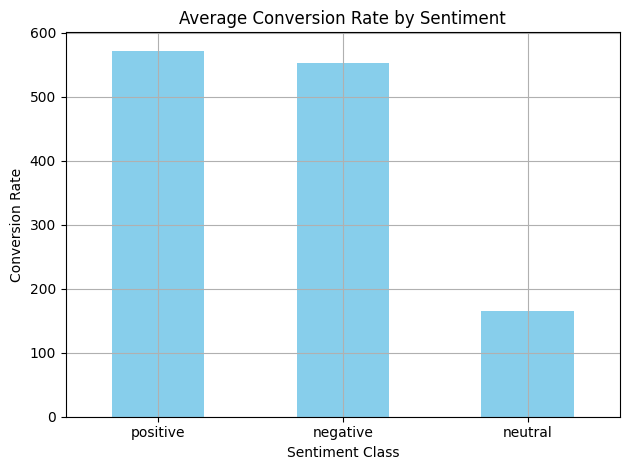

In [431]:
conversion_by_sentiment.plot(kind='bar', color='skyblue')
plt.title('Average Conversion Rate by Sentiment')
plt.ylabel('Conversion Rate')
plt.xlabel('Sentiment Class')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

In [432]:
from transformers import pipeline
from tqdm import tqdm
tqdm.pandas()

classifier = pipeline("zero-shot-classification", model="mtheo/camembert-base-xnli")
labels = ["nouvelles", "politique", "economie", "santé", "divertissement", "météo", "sport", "technologie", "culture", "international"]

df['email_subject_clean'] = df['email_subject'].apply(lambda x: ' '.join(x.split()[:35]))  # Limit to first 40 words for performance
batch_texts = df['email_subject_clean'].tolist()
batch_size = 16 

topics = []

for i in tqdm(range(0, len(batch_texts), batch_size)):
    batch = batch_texts[i:i+batch_size]
    results = classifier(batch, candidate_labels=labels, multi_label=True)
    for r in results:
        topics.append(r['labels'][r['scores'].index(max(r['scores']))])

df['topic'] = topics
df.loc[df['email_subject'].str.contains("sportifs", case=False), 'topic'] = 'sport'


Device set to use cpu
100%|██████████| 43/43 [18:38<00:00, 26.02s/it]


In [433]:
df['topic'].value_counts()

topic
sport             228
divertissement    170
politique         145
nouvelles          56
economie           39
international      20
technologie        16
météo              10
culture             2
santé               1
Name: count, dtype: int64

In [434]:
#check a topic with a true subject mail
for topic in df['topic'].unique():
    print(f"\n Topic: {topic.upper()}")
    
    subset = df[df['topic'] == topic]['email_subject']
    n = min(3, len(subset))
    print(subset.sample(n=n, random_state=42).tolist())


 Topic: DIVERTISSEMENT
['La Cour constitutionnelle valide la loi sur la grève malgré quelques réserves ; Acquisition du Complexe Mohammed V : un ballon d’essai qui cache un feuilleton à rebondissements ?  ; Les étudiants en médecine dentaire de Casablanca en colère ', '[Test] Il est temps de profiter du Club Avantages du MATIN !', 'Le Maroc déjoue un plan terroriste extrêmement dangereux orchestré par daech dans plusieurs villes ;  Aid Al-Adha : le Maroc se prépare à importer 100.000 moutons d’Australie ; Fitch Solutions alerte sur les risques climatiques pour les banques en Afrique']

 Topic: POLITIQUE
["Le gouvernement annonce bientôt une feuille de route pour l\\'emploi ; Le Maroc suit de près les développements en Syrie (Bourita) ; Les médecins internes et résidents de nouveau en grève ", 'La relation entre les écoles privées et les familles encadrée par un contrat renouvelable annuellement ;  L’agriculture familiale au Maroc, le maillon faible des stratégies agricoles (CESE) ;  R

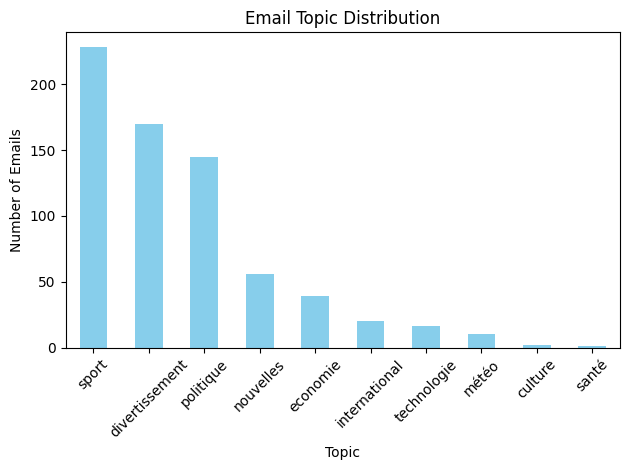

In [435]:
import matplotlib.pyplot as plt

df['topic'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Email Topic Distribution')
plt.ylabel('Number of Emails')
plt.xlabel('Topic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


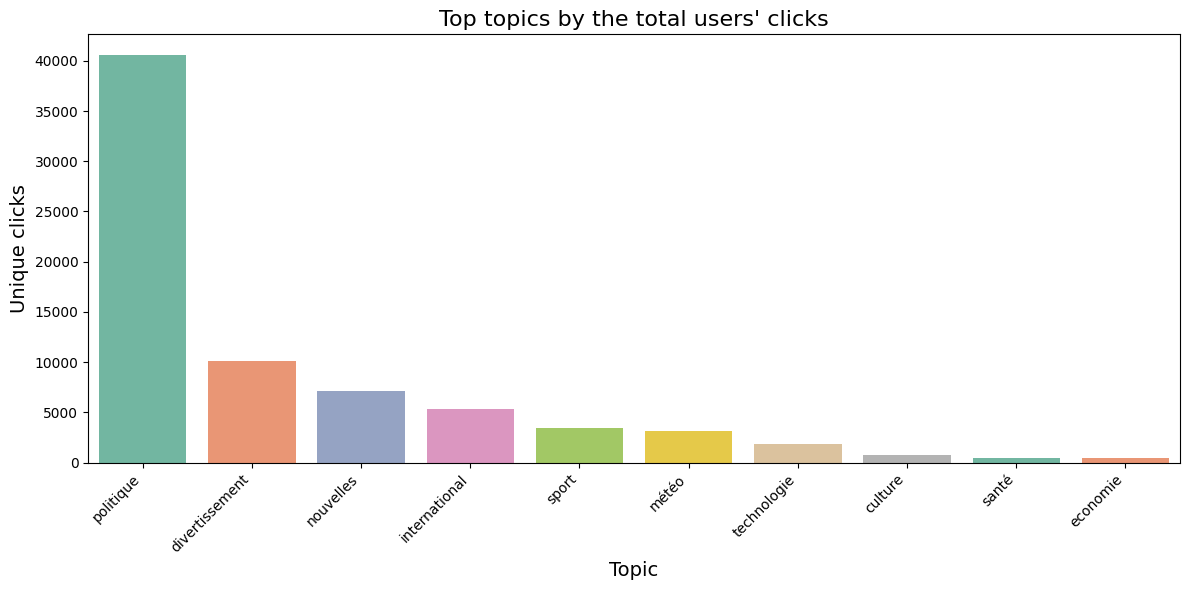

In [436]:
uni_counts = df.groupby("topic")["unique_clicks"].sum()
top_counts = uni_counts.sort_values(ascending=False).head(10)
plot_counts = pd.concat([top_counts])

plt.figure(figsize=(12, 6))
sns.barplot(x=plot_counts.index, y=plot_counts.values, palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.title("Top topics by the total users' clicks", fontsize=16)
plt.xlabel("Topic", fontsize=14)
plt.ylabel("Unique clicks", fontsize=14)
plt.tight_layout()
plt.show()


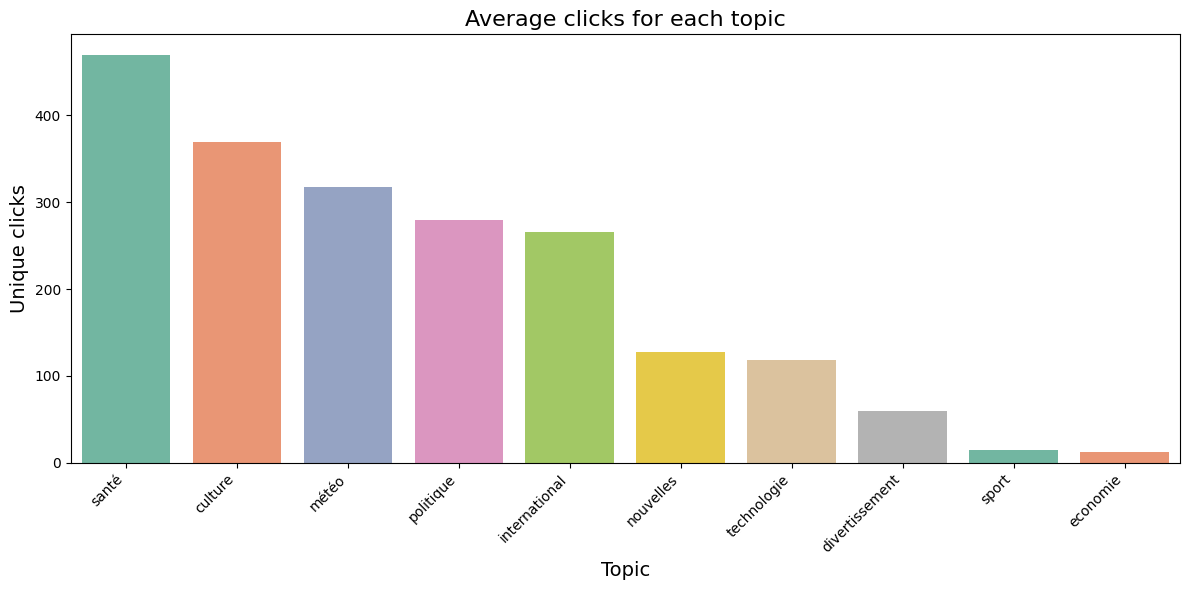

In [437]:
cliks_sums = df.groupby("topic")["unique_clicks"].sum()
email_counts = df["topic"].value_counts()
avg_clicks = (cliks_sums / email_counts).sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_clicks.index, y=avg_clicks.values, palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.title("Average clicks for each topic", fontsize=16)
plt.xlabel("Topic", fontsize=14)
plt.ylabel("Unique clicks", fontsize=14)
plt.tight_layout()
plt.show()

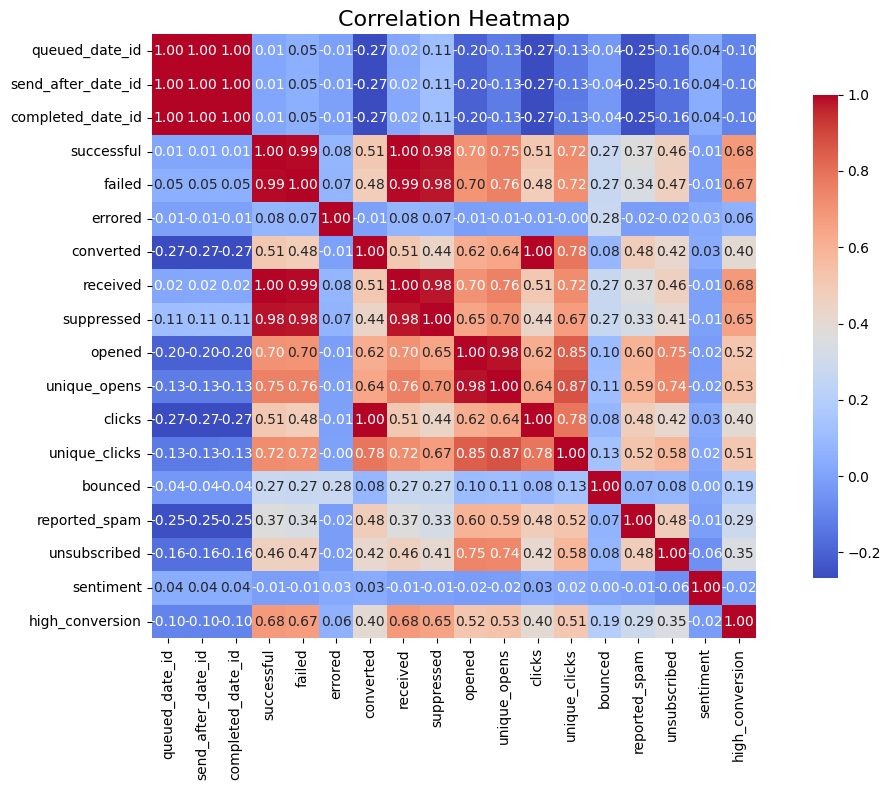

In [438]:
corre = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corre, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

In [439]:
df['email_from_name'].value_counts()

email_from_name
Matin News             536
Insaf | LeMatin.ma      84
Lematin                 42
Insaf                   19
Le Matin                 4
Abonnement Le Matin      2
Name: count, dtype: int64

In [440]:
df['email_from_address'].value_counts()

email_from_address
matinnews@lematin.ma          536
i.mtairag@lematin.ma           61
abo@lematin.ma                 48
hello@news-send.lematin.ma     41
y.moussaoui@lematin.ma          1
Name: count, dtype: int64

In [441]:
#combine date and time columns into datetime
df['queued_datetime'] = pd.to_datetime(df['queued_date'].astype(str) + ' ' + df['queued_time'].astype(str))
df['send_after_datetime'] = pd.to_datetime(df['send_after_date'].astype(str)+ ' ' + df['send_after_time'].astype(str), errors='coerce')  # handle NULLs
df['completed_datetime'] = pd.to_datetime(df['completed_date'].astype(str) + ' ' + df['completed_time'].astype(str), errors='coerce')  # handle NULLs

In [442]:
#create delay and duration columns
df['delay_minutes'] = (df['send_after_datetime'] - df['queued_datetime']).dt.total_seconds() / 60
df['send_duration_minutes'] = (df['completed_datetime'] - df['send_after_datetime']).dt.total_seconds() / 60
df['total_pipeline_minutes'] = (df['completed_datetime'] - df['queued_datetime']).dt.total_seconds() / 60 


In [443]:
df['send_hour'] = df['send_after_datetime'].dt.hour
df['send_dayofweek'] = df['send_after_datetime'].dt.dayofweek  # 0 = Monday 1 = Tuesday, ..., 6 = Sunday
df['is_weekend'] = df['send_dayofweek'] >= 5


In [444]:
#drop columns that are not useful for the model
#drop completed_date, completed_time, email_reply_to_address, notification_id, completed_date_id
df.drop(columns=[
    'queued_date', 'queued_time',
    'send_after_date', 'send_after_time',
    'completed_date', 'completed_time',
    'queued_date_id', 'send_after_date_id', 'completed_date_id'
], inplace=True)


In [445]:
#drop email_subject
df.drop(columns=['email_subject'], inplace=True)

In [446]:
df[['send_hour', 'send_dayofweek']].sample(10)

,send_hour,send_dayofweek
86,16,2
643,16,2
580,16,4
317,6,3
515,7,3
530,7,2
120,6,1
538,16,6
503,16,6
556,16,6


In [447]:
from sklearn.preprocessing import LabelEncoder
le_id=LabelEncoder()
df['notification_id'] = le_id.fit_transform(df['notification_id'])

In [448]:
label_mapping = dict(zip(le_id.classes_, le_id.transform(le_id.classes_)))
print(label_mapping)

{'0002d2e6-9295-46f4-9d76-b7e913970f6a': np.int64(0), '003b968d-8156-4557-a7be-753900c647c9': np.int64(1), '00a0e33e-f8e7-4419-b946-e04d46932c03': np.int64(2), '01c9ed87-8f0e-4774-b645-85d1c978d031': np.int64(3), '0228c92c-d629-45db-a076-d50017e583a9': np.int64(4), '02b38261-01c9-4b73-b978-79a4c8ac37e4': np.int64(5), '03dc0d3d-1584-42d8-b8a9-acf5c5744eca': np.int64(6), '03f58bd9-7c86-46a1-9b60-f4b7a206bbee': np.int64(7), '044bc2cb-24d9-4e1c-b3b0-be5cca797468': np.int64(8), '0637f08c-abe2-4bfc-a0c8-f248bd98ef56': np.int64(9), '0723a1a2-d18a-4170-8001-4bd551586018': np.int64(10), '0759b0c5-7a0c-4fc9-8b88-7db84f6de53e': np.int64(11), '077f9e16-3cfb-453d-a583-6d25269e033e': np.int64(12), '07fffbed-4288-4aeb-a96e-17375497cf4e': np.int64(13), '08ad049f-1065-4bec-9278-e605790ac4a6': np.int64(14), '092c93b5-94d8-47f6-a6a2-9c78bc0c546a': np.int64(15), '093a31b4-f274-4f5f-838a-8363174a69aa': np.int64(16), '0a29a496-d010-4936-9cd0-e023fd7c6dec': np.int64(17), '0a5af44f-dc07-489f-bff4-5045ae5d46a5

In [449]:
le_id=LabelEncoder()
df['topic'] = le_id.fit_transform(df['topic'])
label_mapping = dict(zip(le_id.classes_, le_id.transform(le_id.classes_)))
print(label_mapping)

{'culture': np.int64(0), 'divertissement': np.int64(1), 'economie': np.int64(2), 'international': np.int64(3), 'météo': np.int64(4), 'nouvelles': np.int64(5), 'politique': np.int64(6), 'santé': np.int64(7), 'sport': np.int64(8), 'technologie': np.int64(9)}


In [450]:
le_name = LabelEncoder()
df["email_from_name"]=le_name.fit_transform(df["email_from_name"])
label_mapping = dict(zip(le_name.classes_, le_name.transform(le_name.classes_)))
print(label_mapping)

{'Abonnement Le Matin': np.int64(0), 'Insaf ': np.int64(1), 'Insaf | LeMatin.ma': np.int64(2), 'Le Matin': np.int64(3), 'Lematin': np.int64(4), 'Matin News': np.int64(5)}


In [451]:
le_address = LabelEncoder()
df["email_from_address"]=le_address.fit_transform(df["email_from_address"])
label_mapping = dict(zip(le_address.classes_, le_address.transform(le_address.classes_)))
print(label_mapping)

{'abo@lematin.ma': np.int64(0), 'hello@news-send.lematin.ma': np.int64(1), 'i.mtairag@lematin.ma': np.int64(2), 'matinnews@lematin.ma': np.int64(3), 'y.moussaoui@lematin.ma': np.int64(4)}


In [452]:
le_segments = LabelEncoder()
df["included_segments"]=le_segments.fit_transform(df["included_segments"])
label_mapping = dict(zip(le_segments.classes_, le_segments.transform(le_segments.classes_)))
print(label_mapping)

{'Abonné premium et gratuit': np.int64(0), 'Abonné premium et gratuit, Abonnés interne, Abonnés Premium, list abo finalisés dec 03_12': np.int64(1), 'Abonné premium et gratuit, Abonnés interne, list abo finalisés dec 03_12': np.int64(2), 'Abonné premium et gratuit, list abo finalisés dec 03_12': np.int64(3), 'Abonnés Premium': np.int64(4), 'Abonnés Premium, Abonnés interne': np.int64(5), 'Abonnés Premium, Listes des inscrits': np.int64(6), 'Abonnés interne, Abonnés Premium': np.int64(7), 'Abonnés interne, Abonnés Premium, Active Users, Email_Annonces2024, paywall': np.int64(8), 'Email_Annonces2024': np.int64(9), 'Event / Gaming': np.int64(10), 'List Desabonné premium 06/01/2025': np.int64(11), 'List affilité premium read 27/11': np.int64(12), 'List checkin MTF 2024-2023': np.int64(13), 'Maroc Leasing 7/11': np.int64(14), 'Old List': np.int64(15), 'Old List, Subscribed Users': np.int64(16), 'Old List, Subscribed Users, Breaking News, Newsletter': np.int64(17), 'Subscribed Users': np.int

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   notification_id         687 non-null    int64         
 1   email_from_name         687 non-null    int64         
 2   email_from_address      687 non-null    int64         
 3   email_reply_to_address  138 non-null    object        
 4   included_segments       687 non-null    int64         
 5   successful              687 non-null    int64         
 6   failed                  687 non-null    int64         
 7   errored                 687 non-null    int64         
 8   converted               687 non-null    int64         
 9   received                687 non-null    int64         
 10  suppressed              687 non-null    int64         
 11  opened                  687 non-null    int64         
 12  unique_opens            687 non-null    int64     

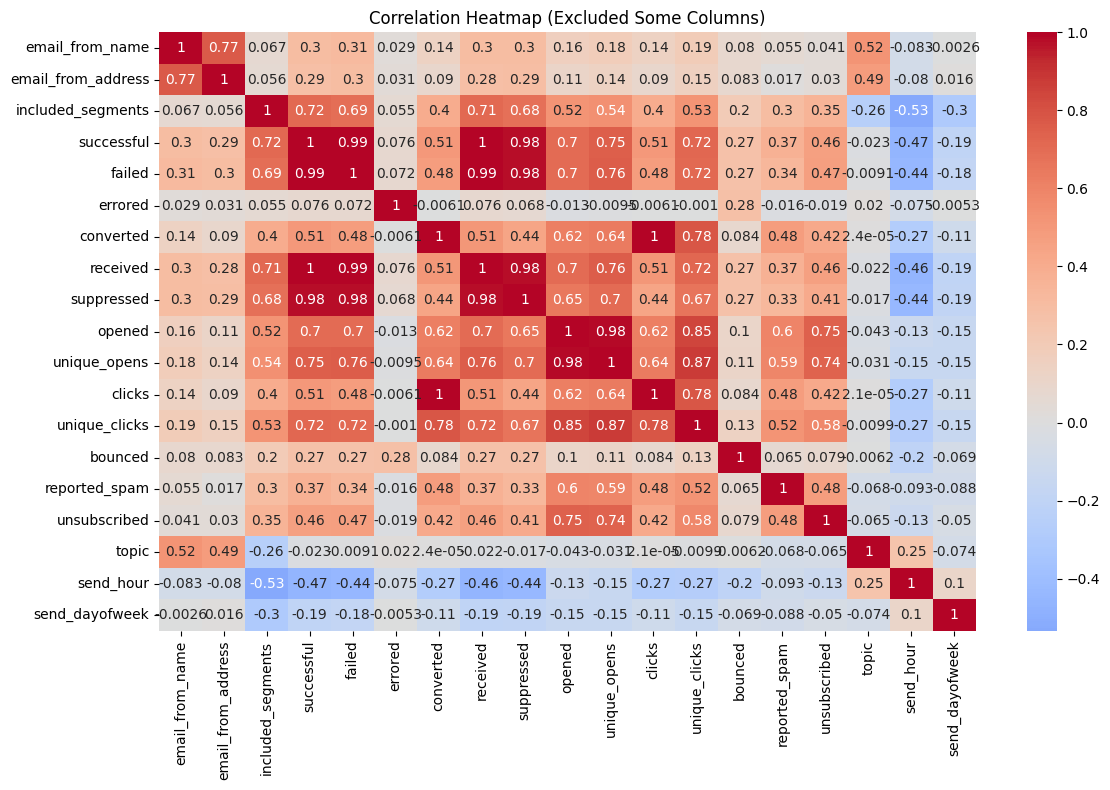

In [454]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns excluded
exclude_columns = ['notification_id','is_weekend','total_pipeline_minutes','send_duration_minutes','delay_minutes','completed_datetime',
                   'send_after_datetime', 'queued_datetime', 'high_conversion', 'email_reply_to_address', 'sentiment']

df_corr = df.drop(columns=exclude_columns)
corr = df_corr.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Excluded Some Columns)")
plt.tight_layout()
plt.show()


In [455]:
from sklearn import model_selection, ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree, discriminant_analysis
from xgboost import XGBClassifier

Target = 'converted'

data1_x_bin = [ 'email_from_name', 'email_from_address', 'included_segments', 'topic',
    'successful', 'failed', 'errored', 'received', 'suppressed', 'opened',
    'unique_opens', 'clicks', 'unique_clicks', 'bounced', 'reported_spam', 'unsubscribed',
    'send_hour', 'send_dayofweek'
]

# Initialize MLA
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
]

MLA_predict = pd.DataFrame()
MLA_predict[Target] = df[Target]


cv_split = model_selection.ShuffleSplit(n_splits=3, test_size=0.3, train_size=0.6, random_state=0)

MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns=MLA_columns)

row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    try:
        cv_results = model_selection.cross_validate(alg, df[data1_x_bin], df[Target], cv=cv_split, return_train_score=True)

        MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
        MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
        MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
        MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std() * 3

        alg.fit(df[data1_x_bin], df[Target])
        MLA_predict[MLA_name] = alg.predict(df[data1_x_bin])

    except Exception as e:
        print(f"Skipping {MLA_name} due to error: {e}")
    
    row_index += 1

MLA_compare.sort_values(by='MLA Test Accuracy Mean', ascending=False, inplace=True)
MLA_compare


Skipping LogisticRegressionCV due to error: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 2035, in fit
    coefs_paths = np.reshape(
                  ^^^^^^^^^^^
  File "c:\Python\Python311\Lib\site-packages\numpy\_core\fromnumeric.py", line 299, in reshape
    return

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
19,LinearDiscriminantAnalysis,"{'covariance_estimator': None, 'n_components':...",0.977346,0.597424,0.083952,0.017695
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1.0,0.57649,0.088815,0.038037
1,BaggingClassifier,"{'bootstrap': True, 'bootstrap_features': Fals...",0.995955,0.558776,0.054656,0.581747
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",1.0,0.533011,0.049266,65.437397
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1.0,0.436393,0.058372,1.591328
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",1.0,0.37037,0.053359,0.796979
12,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.721683,0.272142,0.088815,0.031116
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'estimator': None, 'l...",0.334142,0.252818,0.055922,0.860662
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.250809,0.239936,0.024633,0.016885
18,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1.0,0.236715,0.133354,0.004193


In [456]:
X = df[data1_x_bin]
scaler = StandardScaler()
scaler.fit(X)

standarized_data = scaler.transform(X)

print(standarized_data)

X = standarized_data
Y = df[Target]

print(X)
print(Y)

[[-0.37033096  0.47002234  0.63793438 ...  0.79675172 -0.06687866
   0.65673027]
 [ 0.48056326  0.47002234  0.63793438 ... -0.15280801 -1.41822101
  -1.43203685]
 [ 0.48056326  0.47002234  1.20034814 ... -0.36382129  1.50968742
  -1.43203685]
 ...
 [ 0.48056326  0.47002234 -0.90870345 ... -0.36382129  0.38356879
   1.70111384]
 [ 0.48056326  0.47002234 -0.90870345 ... -0.36382129  0.83401624
   1.70111384]
 [ 0.48056326  0.47002234  1.0597447  ... -0.25831465 -1.41822101
  -1.43203685]]
[[-0.37033096  0.47002234  0.63793438 ...  0.79675172 -0.06687866
   0.65673027]
 [ 0.48056326  0.47002234  0.63793438 ... -0.15280801 -1.41822101
  -1.43203685]
 [ 0.48056326  0.47002234  1.20034814 ... -0.36382129  1.50968742
  -1.43203685]
 ...
 [ 0.48056326  0.47002234 -0.90870345 ... -0.36382129  0.38356879
   1.70111384]
 [ 0.48056326  0.47002234 -0.90870345 ... -0.36382129  0.83401624
   1.70111384]
 [ 0.48056326  0.47002234  1.0597447  ... -0.25831465 -1.41822101
  -1.43203685]]
0      177
1    

In [457]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(687, 18) (549, 18) (138, 18)


In [501]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=0)
search = RandomizedSearchCV(rf, param_grid, n_iter=10, scoring='r2', cv=3, random_state=0)
search.fit(X_train, Y_train)

best_rf = search.best_estimator_
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

#print(f"[converted] Accuracy: {accuracy_score(Y_test, y_pred):.2f}")

print(f"MSE:  {mse:.2f}")
print(f"R²:   {r2:.2f}")


MSE:  254.04
R²:   1.00


In [459]:
y_train_pred = best_rf.predict(X_train)
mse_train = mean_squared_error(Y_train, y_train_pred)
r2_train = r2_score(Y_train, y_train_pred)
print(f"Train MSE: {mse_train:.2f} | Train R²: {r2_train:.2f}")

Train MSE: 476.73 | Train R²: 1.00


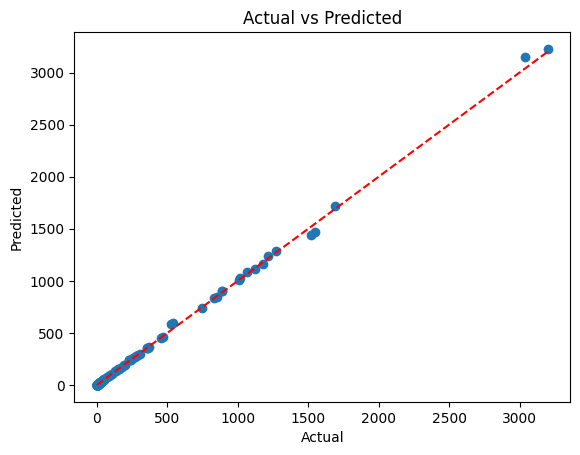

In [460]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # identity line
plt.show()

In [463]:
y_train_pred = best_rf.predict(X_train)
y_test_pred  = best_rf.predict(X_test)

#Compute metrics
mse_train = mean_squared_error(Y_train, y_train_pred)
mse_test  = mean_squared_error(Y_test,  y_test_pred)

rmse_train = mse_train**0.5
rmse_test  = mse_test**0.5

mae_train = mean_absolute_error(Y_train, y_train_pred)
mae_test  = mean_absolute_error(Y_test,  y_test_pred)

r2_train = r2_score(Y_train, y_train_pred)
r2_test  = r2_score(Y_test,  y_test_pred)

#Printing them
print(f"Train   →  MSE: {mse_train:.3f}, RMSE: {rmse_train:.3f}, MAE: {mae_train:.3f}, R²: {r2_train:.3f}")
print(f"Test    →  MSE: {mse_test:.3f},  RMSE: {rmse_test:.3f},  MAE: {mae_test:.3f},  R²: {r2_test:.3f}")

Train   →  MSE: 476.730, RMSE: 21.834, MAE: 3.778, R²: 0.999
Test    →  MSE: 254.043,  RMSE: 15.939,  MAE: 4.912,  R²: 0.999


In [507]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = df[data1_x_bin]
y = df["converted"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model2 = Ridge(alpha=1.0)
model2.fit(x_train_scaled, y_train)

pred_opens = model2.predict(x_test_scaled)

rmse = mean_squared_error(y_test, pred_opens, squared=False)
r2 = r2_score(y_test, pred_opens)
mae = mean_absolute_error(y_test, pred_opens)

print(f"[converted] RMSE: {rmse:.2f}")
print(f"[converted] MAE:  {mae:.2f}")
print(f"[converted] R²:   {r2:.2f}")


[converted] RMSE: 1.20
[converted] MAE:  0.58
[converted] R²:   1.00


In [464]:
def get_encoded_value(label_encoder, label_name):
    try:
        return label_encoder.transform([label_name])[0]
    except ValueError:
        return f"Label '{label_name}' not found in encoder classes."


In [465]:
from datetime import datetime

def get_send_features(date_str, time_str):
    try:
        dt = datetime.strptime(f"{date_str} {time_str}", "%d/%m/%Y %H:%M:%S")
        send_hour = dt.hour
        send_dayofweek = dt.weekday()
        return send_hour, send_dayofweek
    except ValueError as e:
        return f"Invalid input: {e}"


In [466]:
get_encoded_value(le_id, "météo")

np.int64(4)

In [467]:
get_encoded_value(le_name, "Matin News")

np.int64(5)

In [468]:
get_encoded_value(le_address, "matinnews@lematin.ma")

np.int64(3)

In [469]:
get_encoded_value(le_segments, "Subscribed Users")

np.int64(18)

In [470]:
get_send_features("21/09/2024", "11:13:51")

(11, 5)

In [ ]:
prediction1 = {
    'email_from_name': 5,
    'email_from_address': 3,
    'included_segments': 18,
    'topic': 4,
    'successful': 49084,
    'failed': 3113,
    'errored': 2,
    'received': 46065,
    'suppressed': 2879,
    'opened': 11274,
    'unique_opens': 7899,
    'clicks': 483,
    'unique_clicks': 348,
    'bounced': 1,
    'reported_spam': 0,
    'unsubscribed': 30,
    'send_hour': 11,
    'send_dayofweek': 5
}
prediction1_scaled = scaler.transform([list(prediction1.values())])
prediction1_scaled = prediction1_scaled.reshape(1, -1)
prediction1_result = best_rf.predict(prediction1_scaled)
print(f"Prediction for the first email: {prediction1_result[0]:.2f} (converted probability)") # the true value of converted is 483

Prediction for the first email: 470.69 (converted probability)


In [476]:
#let's now predict for unique_opens
data2_x_bin = [
    'email_from_name', 'email_from_address', 'included_segments', 'topic',
    'successful', 'failed', 'errored', 'converted', 'received', 'suppressed', 'opened',
    'clicks', 'unique_clicks', 'bounced', 'reported_spam', 'unsubscribed','send_hour', 'send_dayofweek'
]

Target2 = 'unique_opens'
X_Opens = df[data2_x_bin]
Y_Opens = df[Target2]

scaler2 = StandardScaler()
X_Opens_scaled = scaler2.fit_transform(X_Opens)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_Opens_scaled, Y_Opens, test_size=0.2, random_state=2)

# Train a Random Forest Regressor for unique opens like we did for converted
rf_clicks = RandomForestRegressor(random_state=0)
rf_clicks.fit(X2_train, Y2_train)

pred_opens = rf_clicks.predict(X2_test)
print(f"[unique_opens] RMSE: {mean_squared_error(Y2_test, pred_opens, squared=False):.2f}")
print(f"[unique_opens] R²: {r2_score(Y2_test, pred_opens):.2f}")


[unique_opens] RMSE: 173.21
[unique_opens] R²: 1.00


In [477]:
prediction2 = {
    'email_from_name': 5,
    'email_from_address': 3,
    'included_segments': 18,
    'topic': 4,
    'successful': 49084,
    'failed': 3113,
    'converted': 483,
    'errored': 2,
    'received': 46065,
    'suppressed': 2879,
    'opened': 11274,
    'clicks': 483,
    'unique_clicks': 348,
    'bounced': 1,
    'reported_spam': 0,
    'unsubscribed': 30,
    'send_hour': 11,
    'send_dayofweek': 5
}
prediction2_scaled = scaler2.transform([list(prediction2.values())])
prediction2_scaled = prediction2_scaled.reshape(1, -1)
prediction2_result = rf_clicks.predict(prediction2_scaled)
print(f"Prediction for the: {prediction2_result[0]:.2f} (unique opens)")# the true value of unique_opens is 7899

Prediction for the: 7641.40 (unique opens)
